# Validação
Objetivo: encontrar melhor modelo entre diferentes algoritmos

## Importações

In [1]:
import numpy as np
import joblib
import pandas as pd
from sklearn.model_selection import KFold, train_test_split

from validation_funcs import *

seed = 777
rng = np.random.default_rng(seed)

def rng_int():
    return rng.integers(1, 10000)

## Preparação

In [2]:
df = pd.read_csv('../../data/preprocessed/_90_drp_ohe.csv')

X = df.drop(['Dropout'], axis=1)
y = df['Dropout']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, stratify=y, random_state=rng_int())
kfold = KFold(n_splits=5, shuffle=True, random_state=rng_int())

## Análise de curva de aprendizado

### Árvore de Decisão

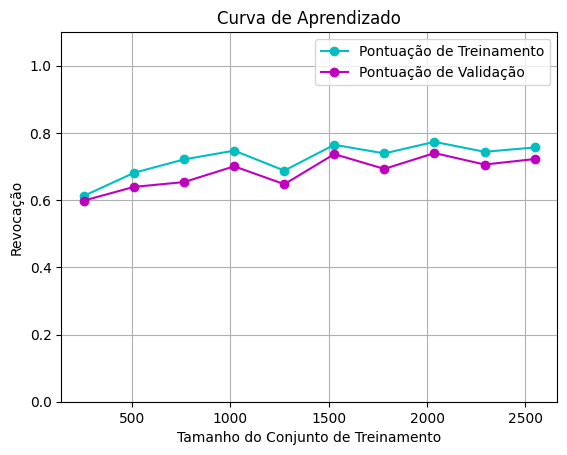

In [3]:
dtc = joblib.load(f'../dump/decision_tree_r73.pkl')

plot_learning_curve(dtc, X_train, y_train, kfold, scoring='recall')

### Gradient Boost

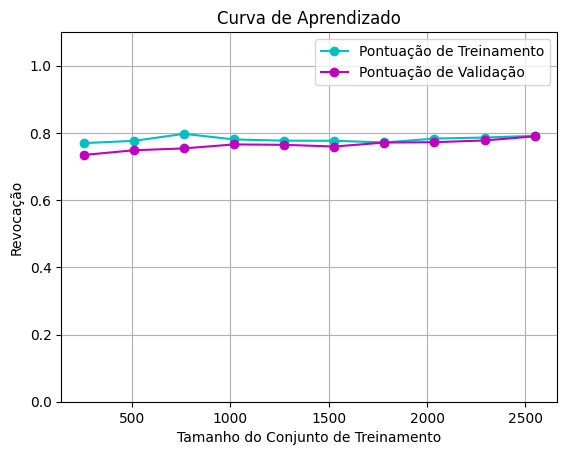

In [4]:
gbc = joblib.load(f'../dump/gradient_boost_r78.pkl')

plot_learning_curve(gbc, X_train, y_train, kfold, scoring='recall')

### Regressão Logística

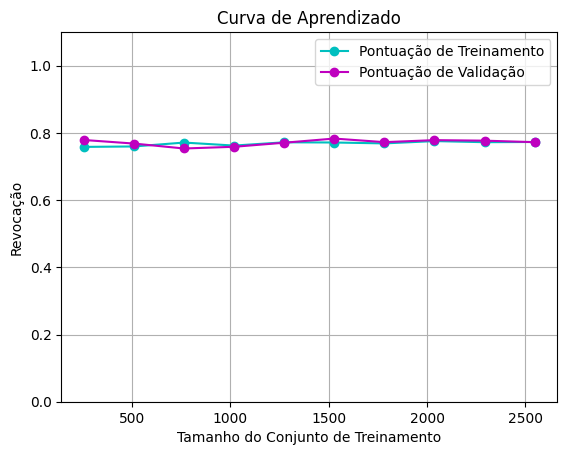

In [5]:
lrc = joblib.load(f'../dump/logistic_regression_r77.pkl')

plot_learning_curve(lrc, X_train, y_train, kfold, scoring='recall')

### SVM

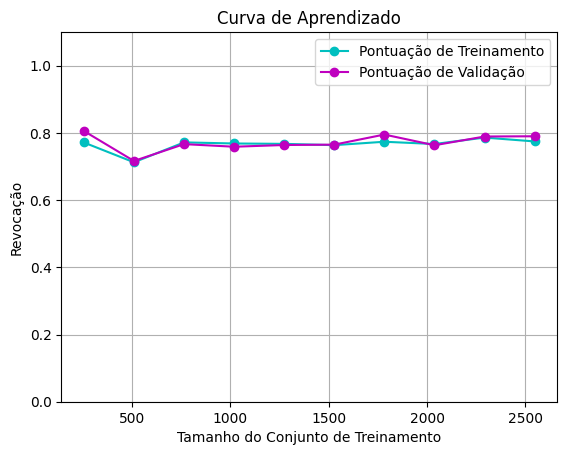

In [7]:
svc = joblib.load(f'../dump/svm_r76.pkl')

plot_learning_curve(svc, X_train, y_train, kfold, scoring='recall')

## Conclusão

O modelo eleito foi: Logistic Regression